# Target Imbalance - Unit 02 - Combine ML pipeline and Target Imbalance

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

  * Analyze how balanced your target distribution is
  * Understand and select Over Sampling or Under Sampling techniques to handle target imbalance



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

We will install imbalanced-learn to handle imbalanced targets, the documentation link is [here](https://imbalanced-learn.org/stable/auto_examples/api/plot_sampling_strategy_usage.html)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Combine Target Imbalance and ML Pipeline

In the workplace, your data will likely require data cleaning. When dealing with target imbalance, your data can't contain missing data since that is a requirement for the sampling algorithm from imbalanced-learn.
* Therefore, we take the opportunity to perform data cleaning and feature engineering before sampling.


We will consider 2 scenarios where you will handle target imbalance
* When there **is no** need for data cleaning and feature engineering
* When there **is a need** for data cleaning and feature engineering.

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> No need for data cleaning and feature engineering

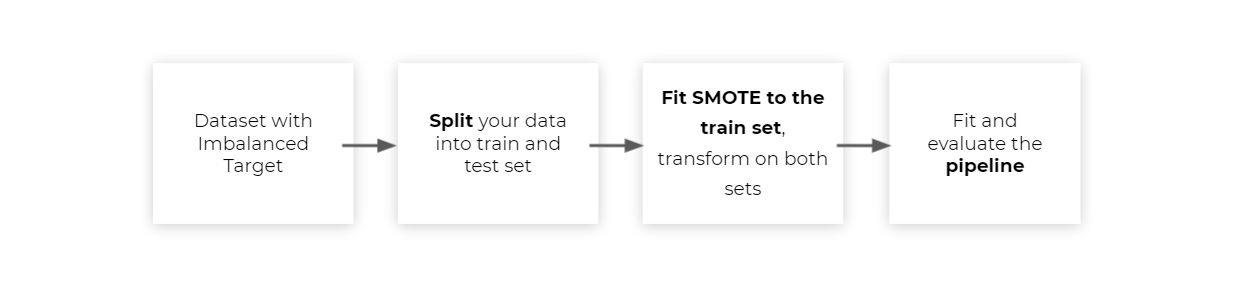

Assume your data is cleaned and doesn't need additional processing, but unfortunately, it is imbalanced. Then, you can add SMOTE to your familiar techniques when fitting models.

You should consider:
* Split your data into train and test set
* Fit SMOTE to the train set, transform on train and test set
* Fit and evaluate the pipeline

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **In the end, you will have 1 pipeline**

We will create an imbalanced numerical dataset with make_classification; there are 2 classes, 10000 rows and five features.
* We assign X and y to a DataFrame, and the columns' names go from X1 to X5. The target variable is called Target

from  sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=5,
                           n_redundant=3, n_classes=2,
                           n_clusters_per_class=2, weights=[0.90], 
                           flip_y=0, random_state=1)


df = pd.DataFrame(data=X,columns=['X1','X2','X3','X4','X5'])
df['Target'] = y
df.head()

We check the target distribution, and it is imbalanced

df['Target'].value_counts()

We check for missing data
* There is no missing data

df.isna().sum()

We split the train and test set using the usual technique
* We print the train and test shapes

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df.drop(['Target'],axis=1),
                                    df['Target'],
                                    test_size = 0.2,
                                    random_state = 0
                                    )

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We double-check the train set target distribution

y_train.value_counts()

And test set distribution

y_test.value_counts()

The data we are using is already cleaned, it doesn't need any encoding, and we will not worry with numerical feature engineering, to focus only on the scope of the exercise.
* We create a function pipeline_clf()` that returns a pipeline with 3 steps: feature scaling, feature selection and model. We picked up a LogisticRegression algorithm (here, we are not interested in finding the best model, just to demonstrate SMOTE)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # Feat Scaling
from sklearn.feature_selection import SelectFromModel # Feat Selection
from sklearn.linear_model import LogisticRegression # ML algorithm for classification

def pipeline_clf():
  pipeline_base = Pipeline([
       ("scaler",StandardScaler() ),
       ("feat_selection",SelectFromModel(LogisticRegression(random_state=0)) ),
       ("model",LogisticRegression(random_state=0) )
  ])

  return pipeline_base

pipeline_clf()

We fit the pipeline to the train set

pipe = pipeline_clf()
pipe.fit(X_train,y_train)

And check the confusion matrix on the test set
* We want the "actual" to be the columns and "predictions" to be the rows in the confusion matrix, therefore we flipped the arguments.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_true=pipe.predict(X_test), y_pred=y_test)

Finally, we check the classification report of the test set.
* Typically, the minority class in these cases are the ones in which you are really interested in predicting properly, like, whether it is a disease or not, or it is a fraud or not; and typically, your dataset will contain fewer instances of these classes
* In this case, accuracy is not a good indicator of performance metrics. We will consider the recall from class 1, which is 0.64; let's see if, with the SMOTE technique, we can improve it and if there is a trade-off

print(classification_report(y_pred=pipe.predict(X_test), y_true=y_test))

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's resample the dataset with SMOTE, where the sampling strategy is 'not majority'. We `.fit_resample()` and print the train and test sets.
* As we may expect, it increased the train set

from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='not majority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We check the train set target distribution
* Now both classes are balanced

y_train.value_counts()

We create a new pipeline

pipe = pipeline_clf()
pipe.fit(X_train,y_train)

We check the confusion matrix on the test set

confusion_matrix(y_true=pipe.predict(X_test), y_pred=y_test)

Finally we run a classification report on the test set

print(classification_report(y_pred=pipe.predict(X_test), y_true=y_test))

We compare the confusion matrix and classification before and after resampling. We notice that:
* The accuracy decreased
* The recall and precision on class 0 (dominant) are still good
* The recall on class 1 (minority) increased, but precision decreased.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Assuming for our context that Recall on class 0 is super important, the performance increased when we applied the SMOTE technique. 

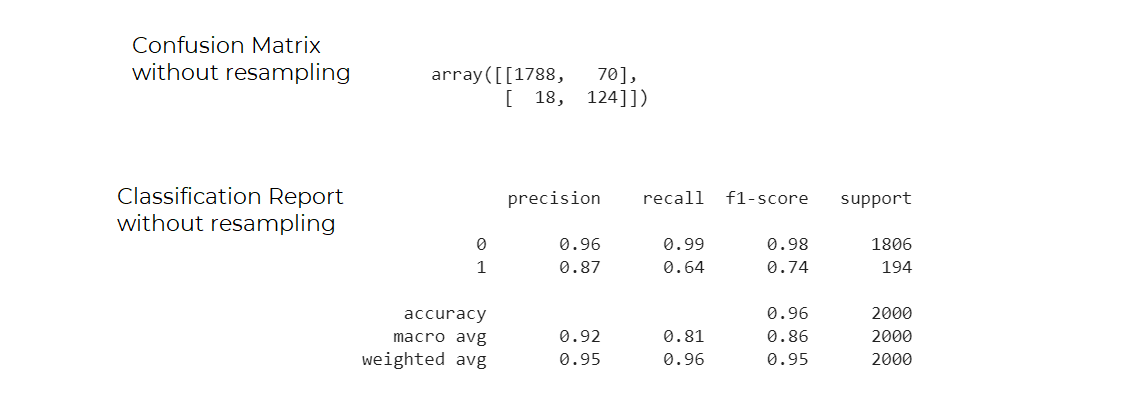

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> There is no need for data cleaning and feature engineering

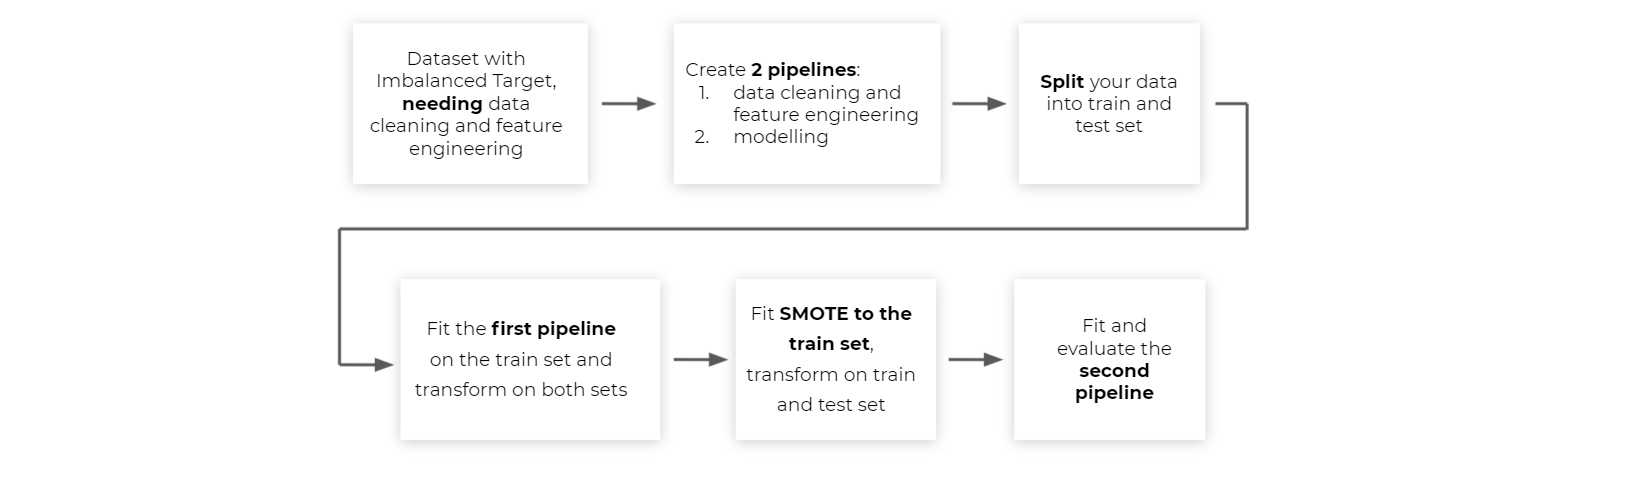

In the last example, the data was already cleaned and didn't need any processing. You split the data into train and test sets, applied SMOTE and fitted the model. You had 1 pipeline to manage all of that.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> We know that cleaned data doesn't often happen in the workplace. SMOTE only works when the data doesn't have missing data, so we take the following initiative to handle targe imbalance

* Create 2 pipelines: one for data cleaning and feature engineering, and another for modelling.
* Split your data into train and test set
* Fit the first pipeline (data cleaning and feature engineering) on the train set and transform on both sets
* Apply SMOTE to the train set
* Fit and evaluate the second pipeline (modelling)

 
 
 <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **In the end, you will have 2 pipelines.**

We will consider the same dataset from the previous example, but on purpose, we will add missing data. 

from  sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=5,
                           n_redundant=3, n_classes=2,
                           n_clusters_per_class=2, weights=[0.90], 
                           flip_y=0, random_state=1)


df = pd.DataFrame(data=X,columns=['X1','X2','X3','X4','X5'])
df['Target'] = y
df.head()

We replaced the first 100 data points from X1 with missing data (np.NaN). Naturally in the workplace, you will likely not do that, however, in this context, we did this to facilitate the exercise.

df.iloc[0:100,0] = np.NaN

Let's check the DataFrame

df.head()

Let's check target variable frequency

df['Target'].value_counts()

We check the missing levels
* there are missing levels on X1

df.isna().sum()

If we try to apply `SMOTE()` on data with missing data, it will not work. 
* Let's quickly split the train and test set and try to apply `SMOTE()`

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Run the cell below and notice the error: `ValueError: Input contains NaN, infinity or a value too large for dtype('float64').`

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df.drop(['Target'],axis=1),
                                    df['Target'],
                                    test_size = 0.2,
                                    random_state = 0
                                    )

from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='not majority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We create 2 pipelines, the first is `pipeline_dc_fe()` which cleans and feature engineers the data. The second is `pipeline_clf()` is responsible for modelling
* We will define the steps required, but as you may have seen in the previous lessons, it would be your task to figure out the transformers options

from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler # Feat Scaling
from sklearn.feature_selection import SelectFromModel # Feat Selection
from sklearn.linear_model import LogisticRegression # ML algorithm for classification

def pipeline_dc_fe():

  pipeline_base = Pipeline([
       ( 'median',  MeanMedianImputer(imputation_method='median',variables=['X1']) )
  ])

  return pipeline_base

def pipeline_clf():
  pipeline_base = Pipeline([
       ("scaler",StandardScaler() ),
       ("feat_selection",SelectFromModel(LogisticRegression(random_state=0)) ),
       ("model",LogisticRegression(random_state=0) )
  ])

  return pipeline_base

pipeline_dc_fe()

We split the train and test set using the usual technique
* We print the train and test shapes

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df.drop(['Target'],axis=1),
                                    df['Target'],
                                    test_size = 0.2,
                                    random_state = 0
                                    )

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We check the train set target distribution
* It is imbalanced

y_train.value_counts()

And test set distribution

y_test.value_counts()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> We fit the first pipeline with train set and transform on both sets

pipeline_data_cleaning_feat_eng = pipeline_dc_fe()
X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test = pipeline_data_cleaning_feat_eng.transform(X_test)

We check for missing data

X_train.isna().sum()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> Now we apply SMOTE to the train set

* This section will not compare a pipeline difference when you apply and when you don't apply SMOTE() since we did that already in the previous section.

from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='not majority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We check the train set target distribution

y_train.value_counts()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> We then fit the second pipeline

pipe = pipeline_clf()
pipe.fit(X_train, y_train)

And check the confusion matrix on the Test set
* Once again, we want the "actual" to be the columns and "predicted" to be the rows in the confusion matrix, therefore we flipped the arguments.

confusion_matrix(y_true=pipe.predict(X_test), y_pred=y_test)

Finally, we check the classification report on the test set
* The result and interpretation are similar to the example we gave in the previous section. 
* The difference in this section is that we demonstrated an example where the dataset needs to be processed before applying `SMOTE()`

print(classification_report(y_pred=pipe.predict(X_test), y_true=y_test))

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: Let's consider the breast dataset from sklearn. It shows records for a breast mass sample and a diagnosis informing whether it is a malignant or benign cancer

from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df_practice = pd.DataFrame(data.data, columns=data.feature_names)
df_practice['Target'] = data.target
df_practice.head()

On purpose, we will add missing data (np.NanN) to the first 100 rows in the first column

df_practice.iloc[0:100,0] = np.NaN

Let's check the DataFrame

df_practice.head()

Let's check target variable frequency

df_practice['Target'].value_counts()

We check the missing levels
* there is missing level on mean radius

df_practice.isna().sum()

We create 2 pipelines, the first is `pipeline_dc_fe()` which cleans and feature engineers the data. The second is `pipeline_clf()` which is reponsible for modelling
* We define the modeling pipeline with feature scaling, feature selection and logistic regression algorithm

from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler # Feat Scaling
from sklearn.feature_selection import SelectFromModel # Feat Selection
from sklearn.linear_model import LogisticRegression # ML algorithm for classification

def pipeline_dc_fe():

  pipeline_base = Pipeline([
       ( 'median',  MeanMedianImputer(imputation_method='median') )
  ])

  return pipeline_base


def pipeline_clf():
  pipeline_base = Pipeline([
       ("scaler",StandardScaler() ),
       ("feat_selection",SelectFromModel(LogisticRegression(random_state=0)) ),
       ("model",LogisticRegression(random_state=0) )
  ])

  return pipeline_base

pipeline_clf()

We split the train and test set using the usual technique
* We print the train and test shapes

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_practice.drop(['Target'],axis=1),
                                    df_practice['Target'],
                                    test_size = 0.2,
                                    random_state = 0
                                    )

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We check the train set target distribution
* It is imbalanced

y_train.value_counts()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> From here on, you should code.
* We fit the first pipeline with the train set and transform on both sets

pipeline_data_cleaning_feat_eng = pipeline_dc_fe()
# write code to fit and transform pipeline_data_cleaning_feat_eng on X_train
# write code to transform pipeline_data_cleaning_feat_eng on X_test
X_train = pipeline_data_cleaning_feat_eng.fit_transform(X_train)
X_test = pipeline_data_cleaning_feat_eng.transform(X_test)

We check for missing data

X_train.isna().sum()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> Now we apply SMOTE to the train set



from imblearn.over_sampling import SMOTE
# oversample = SMOTE(....) # write code to define your oversample object
# write code to fit and resample on X_train and y_train, sampling strategy may be not majority and random state zero
oversample = SMOTE(sampling_strategy='not majority', random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

We check the train set target distribution

y_train.value_counts()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> We then fit the second pipeline

# write code to create an object called pipe, that receives pipeline_clf()
# fit pipe to the train set
pipe = pipeline_clf()
pipe.fit(X_train, y_train)


Check the confusion matrix on test set

confusion_matrix(y_true=pipe.predict(X_test), y_pred=y_test)

Good job!

---